In [103]:
#import libraries
import urllib.request
from urllib.request import urlopen
import json

#define api key
#obtain this from your Google developer portal
with open('keyfile.txt', 'r') as keyfile:
    google_key = keyfile.read()[:-1]

In [109]:
#define list of coordinates around the site we want to check
list_of_coords = [(42.347558, -71.036876),
                  (42.350643,-71.041062),
                  (42.351024,-71.047154),
                  (42.344236,-71.030853),
                  (42.351595,-71.048012)] 

#define list of venue types to search
#the Google Places API has a set list of place types
#listed here: https://developers.google.com/places/supported_types

list_of_venue_types = ['accounting','airport','atm','bakery','bank','bar','beauty_salon','bicycle_store',
                       'book_store','bus_station','cafe','car_repair','church','clothing_store','convenience_store',
                       'courthouse','dentist','doctor','electronics_store','fire_station','florist','furniture',
                       'gas_station','gym,hair_care','hardware_store','home_goods_store','jewelry_store','laundry',
                       'library','liquor_store','lodging,meal_delivery','meal_takeaway','mosque','museum','night_club',
                       'painter','park','parking','pet_store','pharmacy','physiotherapist','plumber','police',
                       'post_office','real_estate_agency','restaurant','school','shoe_store','shopping_mall','spa',
                       'storage','store','subway_station','supermarket','synagogue','taxi_stand','transit_station',
                       'travel_agency','veterinary_care']

#rank our search results by distance
rank_by = "distance"

In [110]:
#now we will loop through each location in our list of coordinates
#and search for venues of each type in our list of venues

#initialize empty dictionary and counter to store results
local_venues = {} 
counter = 0 

#begin loop for our search
for coordinates in list_of_coords: 
    search_lat = coordinates[0] 
    search_lng = coordinates[1] 
    for venue_type in list_of_venue_types: 
        #call the GooglePlacesSearch function.
        #this function will take your search lat and lng,
        #the venue type, and storage dictionary,
        #search the API, and store the results
        search_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json?location={},{}&rankby={}&key={}&type={}".format(search_lat,search_lng, rank_by, google_key, venue_type) 
        
        #page 1
        #search
        try:
            urlData = search_url
            webURL = urllib.request.urlopen(urlData)
            data = webURL.read()
            #print(data)
            encoding = webURL.info().get_content_charset('utf-8')
            response = json.loads(data.decode(encoding))
            #save to venues dictionary
            #counter = 0
            for item in response['results']:
                venue = {
                    'name' : item['name'],
                    'type' : item['types'],
                    'lat' : item['geometry']['location']['lat'],
                    'long' : item['geometry']['location']['lng'],
                    'id' : item['place_id']}
                local_venues['item_{}'.format(counter)] = venue
                counter += 1
        except:
            #print("*************")
            #print("passed")
            #print("*************")
            pass
        #print("SEARCH LOCATION: ", coordinates)
        #print("SEARCH V TYPE: ", venue_type)
        #print(counter)
        #print(venues)
        #print("---------------------------------------------------------------")
        
        #page 2
        #search
        try:
            urlData = search_url + "&pagetoken=" + response["next_page_token"]
            webURL = urllib.request.urlopen(urlData)
            data = webURL.read()
            encoding = webURL.info().get_content_charset('utf-8')
            response2 = json.loads(data.decode(encoding))
            #save to venues dictionary
            #counter = 20
            for item in response2['results']:
                venue = {
                    'name' : item['name'],
                    'type' : item['types'],
                    'lat' : item['geometry']['location']['lat'],
                    'long' : item['geometry']['location']['lng'],
                    'id' : item['place_id']}
                local_venues['item_{}'.format(counter)] = venue
                counter += 1
        except:
            #print("*************")
            #print("passed")
            #print("*************")
            pass
        #print("SEARCH LOCATION: ", coordinates)
        #print("SEARCH V TYPE: ", venue_type)
        #print(counter)
        #print(venues)
        #print("---------------------------------------------------------------")
            
        #page 3
        #search
        try:
            urlData = search_url + "&pagetoken=" + response2["next_page_token"]
            webURL = urllib.request.urlopen(urlData)
            data = webURL.read()
            encoding = webURL.info().get_content_charset('utf-8')
            response3 = json.loads(data.decode(encoding))
            #save to venues dictionary
            #counter = 40
            for item in response3['results']:
                venue = {
                    'name' : item['name'],
                    'type' : item['types'],
                    'lat' : item['geometry']['location']['lat'],
                    'long' : item['geometry']['location']['lng'],
                    'id' : item['place_id']}
                local_venues['item_{}'.format(counter)] = venue
                counter += 1
        except:
            #print("*************")
            #print("passed")
            #print("*************")
            pass
        #print("SEARCH LOCATION: ", coordinates)
        #print("SEARCH V TYPE: ", venue_type)
        #print(counter)
        #print(venues)
        #print("---------------------------------------------------------------")
        
print("Search Complete. Found and saved {} venues in the venues dictionary".format(len(local_venues)))

Search Complete. Found and saved 5717 venues in the venues dictionary


In [111]:
local_venues['item_0']

{'id': 'ChIJq6qaXoJ644kRoNxCzt2rYyw',
 'lat': 42.34803369999999,
 'long': -71.0411874,
 'name': 'Ellis PC',
 'type': ['accounting', 'finance', 'point_of_interest', 'establishment']}

In [113]:
#Finally, we will save our search results into
#a pandas dataframe
import pandas as pd

#extract keys from data for iteration
keys = []
for key in local_venues.keys():
    keys.append(key) 


#for each key ("venue") in search results
#preapare and sructure data for dataframe
venue_lat = []
venue_lng = []
venue_name = []
venue_id = []
venue_types = []
for i in range(len(local_venues)):
    lat = local_venues[keys[i]]['lat']
    lng = local_venues[keys[i]]['long']
    name = local_venues[keys[i]]['name']
    GoogleID = local_venues[keys[i]]['id']
    venue_type = str(local_venues[keys[i]]['type'])
    
    venue_lat.append(lat)
    venue_lng.append(lng)
    venue_name.append(name)
    venue_id.append(GoogleID)
    venue_types.append(venue_type)
    
#create new dataframe
df = pd.DataFrame()
df['name'] = venue_name
df['lat'] = venue_lat
df['long'] = venue_lng
df['google_id'] = venue_id
df['venue_type'] = venue_types

df.head()

name        lat       long                    google_id  \
0                Ellis PC  42.348034 -71.041187  ChIJq6qaXoJ644kRoNxCzt2rYyw   
1   WithumSmith+Brown, PC  42.349607 -71.042722  ChIJydm7oHhw44kRYeJauZOvntA   
2       Cantor Stefanie D  42.349819 -71.042828  ChIJ0VvNp3hw44kRxv4C86Zgsi8   
3  Goodwin Procter Boston  42.352191 -71.043785  ChIJzyWROoRw44kR__T4RIymGyw   
4                     PwC  42.351162 -71.045188  ChIJ30VlLIJw44kRk4x9eEYUtbg   

                                          venue_type  
0  ['accounting', 'finance', 'point_of_interest',...  
1  ['accounting', 'finance', 'point_of_interest',...  
2  ['lawyer', 'accounting', 'finance', 'point_of_...  
3  ['accounting', 'lawyer', 'finance', 'point_of_...  
4  ['accounting', 'finance', 'point_of_interest',...

In [114]:
#check length
len(df)

5717

number of shapes imported: 1


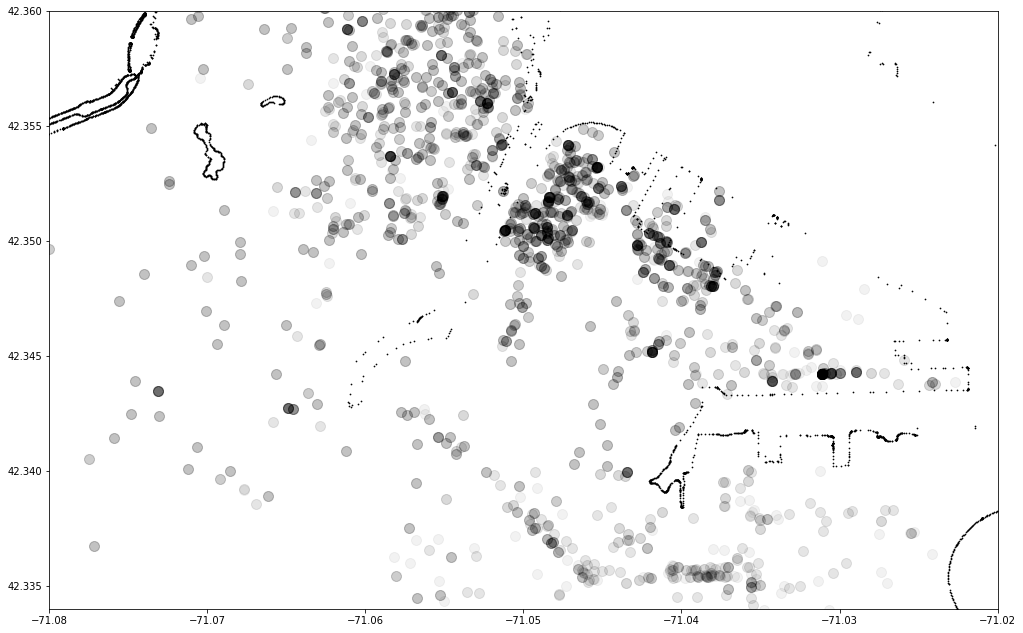

In [183]:
print('number of shapes imported:',len(sf.shapes()))
shape_ex = sf.shape(0)
shape_ex
plt.figure(figsize=[17, 11])
x_lon = np.zeros((len(shape_ex.points),1))
y_lat = np.zeros((len(shape_ex.points),1))
for ip in range(len(shape_ex.points)):
    x_lon[ip] = shape_ex.points[ip][0]
    y_lat[ip] = shape_ex.points[ip][1]
plt.scatter(x_lon,y_lat,color='#000000',s=.5)# use bbox (bounding box) to set plot limits
plt.scatter(df['long'], df['lat'], c='#000000', alpha=0.05, s=100)
plt.xlim(-71.08,-71.02)
plt.ylim(42.334,42.36)
plt.show()

### gather popular time data for each location

In [117]:
#import libraries
import populartimes

In [118]:
df.head()

name        lat       long                    google_id  \
0                Ellis PC  42.348034 -71.041187  ChIJq6qaXoJ644kRoNxCzt2rYyw   
1   WithumSmith+Brown, PC  42.349607 -71.042722  ChIJydm7oHhw44kRYeJauZOvntA   
2       Cantor Stefanie D  42.349819 -71.042828  ChIJ0VvNp3hw44kRxv4C86Zgsi8   
3  Goodwin Procter Boston  42.352191 -71.043785  ChIJzyWROoRw44kR__T4RIymGyw   
4                     PwC  42.351162 -71.045188  ChIJ30VlLIJw44kRk4x9eEYUtbg   

                                          venue_type  
0  ['accounting', 'finance', 'point_of_interest',...  
1  ['accounting', 'finance', 'point_of_interest',...  
2  ['lawyer', 'accounting', 'finance', 'point_of_...  
3  ['accounting', 'lawyer', 'finance', 'point_of_...  
4  ['accounting', 'finance', 'point_of_interest',...

In [121]:
import warnings
warnings.filterwarnings('ignore')
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

#using places from google data search for available popular times data
venues_pop_times = []
for i in range(len(df)):
    id = df.loc[i]['google_id']
    a = populartimes.get_id(google_key, id)
    venues_pop_times.append(a)
    if i % 100 == 0:
        print(((i+1)/(len(df)))*100, "% complete", end="\r")

0.01749169144656288 % complete
1.7666608361028513 % complete
3.5158299807591393 % complete
5.264999125415428 % complete
7.014168270071716 % complete
8.763337414728003 % complete
10.512506559384292 % complete
12.26167570404058 % complete
14.010844848696868 % complete
15.760013993353159 % complete
17.509183138009448 % complete
19.258352282665733 % complete
21.007521427322022 % complete
22.75669057197831 % complete
24.5058597166346 % complete
26.255028861290885 % complete
28.004198005947174 % complete
29.753367150603466 % complete
31.502536295259752 % complete
33.25170543991604 % complete
35.00087458457233 % complete
36.750043729228615 % complete
38.4992128738849 % complete
40.24838201854119 % complete
41.997551163197485 % complete
43.74672030785377 % complete
45.495889452510056 % complete
47.24505859716635 % complete
48.994227741822634 % complete
50.74339688647892 % complete
52.49256603113521 % complete
54.2417351757915 % complete
55.99090432044779 % complete
57.74007346510408 % complete

In [122]:
with open('local_venue_poptimes.json', 'w') as outfile:  
    json.dump(venues_pop_times, outfile, sort_keys=True, indent=4)
    
#save to excel
df.to_excel("df.xlsx")

In [127]:
#only extract places that have pop times data
venues_final = []
for i in range(len(venues_pop_times)):
    try:
        if venues_pop_times[i]['populartimes']:
            venues_final.append(venues_pop_times[i])
    except KeyError:
        pass
print(len(venues_final),"venues have populartimes data")

1246 venues have populartimes data


In [213]:
#add relevent data to datframe
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for day in range(7):
    df[days[day]] = 0
    for venue in venues_final:
        name = venue['name']
        dayOfWeek = venue['populartimes'][day]['name']
        count = sum(venue['populartimes'][day]['data'])
        lat = venue['coordinates']['lat']
        lng = venue['coordinates']['lng']
        idx = venue['id']
        index = df[df['google_id'] == idx].index.values[0]
        
        df.at[index, days[day]] = count
df.head(10)

name        lat       long  \
0                                  Ellis PC  42.348034 -71.041187   
1                     WithumSmith+Brown, PC  42.349607 -71.042722   
2                         Cantor Stefanie D  42.349819 -71.042828   
3                    Goodwin Procter Boston  42.352191 -71.043785   
4                                       PwC  42.351162 -71.045188   
5                          James Crane, CPA  42.353199 -71.045355   
6        Law Office of Kristina Rampl, P.C.  42.353199 -71.045355   
7  Massachusetts Society of Enrolled Agents  42.350153 -71.049584   
8                            Mc Carthy Mary  42.347264 -71.050854   
9                        Alexander Law Firm  42.350506 -71.050320   

                     google_id  \
0  ChIJq6qaXoJ644kRoNxCzt2rYyw   
1  ChIJydm7oHhw44kRYeJauZOvntA   
2  ChIJ0VvNp3hw44kRxv4C86Zgsi8   
3  ChIJzyWROoRw44kR__T4RIymGyw   
4  ChIJ30VlLIJw44kRk4x9eEYUtbg   
5  ChIJ-3gl6H5w44kRtCqvC2NSWoo   
6  ChIJ-3gl6H5w44kRoGm5ElvKun0   
7  ChIJAQAAAFAS44kR3qjZgGa0-hs   
8  ChIJrwKjFn5644kRGqHzrqC73Bw   
9  ChIJtTy9jT1_44kRxR-yJlxAwgs   

                                          venue_type  Monday  Tuesday  \
0  ['accounting', 'finance', 'point_of_interest',...       0        0   
1  ['accounting', 'finance', 'point_of_interest',...       0        0   
2  ['lawyer', 'accounting', 'finance', 'point_of_...       0        0   
3  ['accounting', 'lawyer', 'finance', 'point_of_...     690      947   
4  ['accounting', 'finance', 'point_of_interest',...     525      558   
5  ['accounting', 'finance', 'point_of_interest',...       0        0   
6  ['accounting', 'lawyer', 'finance', 'point_of_...       0        0   
7  ['accounting', 'finance', 'point_of_interest',...       0        0   
8  ['accounting', 'finance', 'point_of_interest',...       0        0   
9  ['accounting', 'lawyer', 'finance', 'point_of_...       0        0   

   Wednesday  Thursday  Friday  Saturday  Sunday  
0          0         0       0         0       0  
1          0         0       0         0       0  
2          0         0       0         0       0  
3        788      1020     630         0       0  
4        575       644     755         0       0  
5          0         0       0         0       0  
6          0         0       0         0       0  
7          0         0       0         0       0  
8          0         0       0         0       0  
9          0         0       0         0       0

In [214]:
#sum the week's data for each venue
df['WeekTotals'] = 0
for i in range(len(df)):
    a = []
    for j in range(7):
        count = df.at[i, days[j]]
        a.append(count)
        #print(a)
    df.at[i, 'WeekTotals'] = sum(a)
df.head(10)

name        lat       long  \
0                                  Ellis PC  42.348034 -71.041187   
1                     WithumSmith+Brown, PC  42.349607 -71.042722   
2                         Cantor Stefanie D  42.349819 -71.042828   
3                    Goodwin Procter Boston  42.352191 -71.043785   
4                                       PwC  42.351162 -71.045188   
5                          James Crane, CPA  42.353199 -71.045355   
6        Law Office of Kristina Rampl, P.C.  42.353199 -71.045355   
7  Massachusetts Society of Enrolled Agents  42.350153 -71.049584   
8                            Mc Carthy Mary  42.347264 -71.050854   
9                        Alexander Law Firm  42.350506 -71.050320   

                     google_id  \
0  ChIJq6qaXoJ644kRoNxCzt2rYyw   
1  ChIJydm7oHhw44kRYeJauZOvntA   
2  ChIJ0VvNp3hw44kRxv4C86Zgsi8   
3  ChIJzyWROoRw44kR__T4RIymGyw   
4  ChIJ30VlLIJw44kRk4x9eEYUtbg   
5  ChIJ-3gl6H5w44kRtCqvC2NSWoo   
6  ChIJ-3gl6H5w44kRoGm5ElvKun0   
7  ChIJAQAAAFAS44kR3qjZgGa0-hs   
8  ChIJrwKjFn5644kRGqHzrqC73Bw   
9  ChIJtTy9jT1_44kRxR-yJlxAwgs   

                                          venue_type  Monday  Tuesday  \
0  ['accounting', 'finance', 'point_of_interest',...       0        0   
1  ['accounting', 'finance', 'point_of_interest',...       0        0   
2  ['lawyer', 'accounting', 'finance', 'point_of_...       0        0   
3  ['accounting', 'lawyer', 'finance', 'point_of_...     690      947   
4  ['accounting', 'finance', 'point_of_interest',...     525      558   
5  ['accounting', 'finance', 'point_of_interest',...       0        0   
6  ['accounting', 'lawyer', 'finance', 'point_of_...       0        0   
7  ['accounting', 'finance', 'point_of_interest',...       0        0   
8  ['accounting', 'finance', 'point_of_interest',...       0        0   
9  ['accounting', 'lawyer', 'finance', 'point_of_...       0        0   

   Wednesday  Thursday  Friday  Saturday  Sunday  WeekTotals  
0          0         0       0         0       0           0  
1          0         0       0         0       0           0  
2          0         0       0         0       0           0  
3        788      1020     630         0       0        4075  
4        575       644     755         0       0        3057  
5          0         0       0         0       0           0  
6          0         0       0         0       0           0  
7          0         0       0         0       0           0  
8          0         0       0         0       0           0  
9          0         0       0         0       0           0

In [215]:
#save to excel
df.to_excel("df.xlsx")

In [216]:
with open('local_venue_poptimes.json', 'w') as outfile:  
    json.dump(venues_final, outfile, sort_keys=True, indent=4)

### --- load saved data

In [257]:
for i in range(len(df)):
    a = ' '.join(str(e) for e in df.iloc[i]['venue_type'])
    df.at[i,'venue_type'] = a
df.head()

name        lat       long                    google_id  \
0                Ellis PC  42.348034 -71.041187  ChIJq6qaXoJ644kRoNxCzt2rYyw   
1   WithumSmith+Brown, PC  42.349607 -71.042722  ChIJydm7oHhw44kRYeJauZOvntA   
2       Cantor Stefanie D  42.349819 -71.042828  ChIJ0VvNp3hw44kRxv4C86Zgsi8   
3  Goodwin Procter Boston  42.352191 -71.043785  ChIJzyWROoRw44kR__T4RIymGyw   
4                     PwC  42.351162 -71.045188  ChIJ30VlLIJw44kRk4x9eEYUtbg   

                                          venue_type  Monday  Tuesday  \
0  accounting finance point_of_interest establish...       0        0   
1  accounting finance point_of_interest establish...       0        0   
2  lawyer accounting finance point_of_interest es...       0        0   
3  accounting lawyer finance point_of_interest es...     690      947   
4  accounting finance point_of_interest establish...     525      558   

   Wednesday  Thursday  Friday  Saturday  Sunday  WeekTotals  
0          0         0       0         0       0           0  
1          0         0       0         0       0           0  
2          0         0       0         0       0           0  
3        788      1020     630         0       0        4075  
4        575       644     755         0       0        3057

In [283]:
words = []
for i in range(len(df)):
    a = text_to_word_sequence(df.iloc[i]['venue_type'], 
                              filters='!"#$%&()*+,-./:;<=>?@[\]^`{|}~', 
                              lower=False, 
                              split=' ')
    for word in a:
        if word not in words:
            words.append(word)
#words

In [289]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(vocabulary=words)

r = pd.SparseDataFrame(cv.fit_transform(df['venue_type']), 
                       df.index,
                       cv.get_feature_names(), 
                       default_fill_value=0)

In [290]:
df_encoded = pd.concat([df, r], axis = 1)
df_encoded

name        lat       long  \
0                                              Ellis PC  42.348034 -71.041187   
1                                 WithumSmith+Brown, PC  42.349607 -71.042722   
2                                     Cantor Stefanie D  42.349819 -71.042828   
3                                Goodwin Procter Boston  42.352191 -71.043785   
4                                                   PwC  42.351162 -71.045188   
5                                      James Crane, CPA  42.353199 -71.045355   
6                    Law Office of Kristina Rampl, P.C.  42.353199 -71.045355   
7              Massachusetts Society of Enrolled Agents  42.350153 -71.049584   
8                                        Mc Carthy Mary  42.347264 -71.050854   
9                                    Alexander Law Firm  42.350506 -71.050320   
10                                                 KEH2  42.337913 -71.042020   
11                                    Tulis Miller & Co  42.351191 -71.050102   
12                                     Conroy John P Pc  42.351150 -71.050221   
13                                 Donahue & Associates  42.336011 -71.035182   
14                         Kiley & O'Toole Tax Services  42.335691 -71.040587   
15                         Financial Reporting Services  42.335428 -71.038456   
16                             George R. Baxendale, CPA  42.354152 -71.051411   
17                              Wall & Associates, Inc.  42.354464 -71.051564   
18                                     Concessa Systems  42.335600 -71.043861   
19                                     Grant Consulting  42.335639 -71.045018   
20                                   A2 Global Shipping  42.350061 -71.057658   
21               Maverick St. Resident Gate East Boston  42.365290 -71.027583   
22        Boston Logan International Airport Terminal B  42.362037 -71.018735   
23                          Car rental , Boston Airport  42.368042 -71.030175   
24    Boston Logan International Airport - Terminal ...  42.366628 -71.016505   
25                   Boston Logan International Airport  42.365613 -71.009560   
26    JetBlue Airways (Maintenance-Materials) Hangar...  42.374258 -71.024628   
27               Massachusetts General Hospital Helipad  42.363638 -71.069183   
28    Signature Flight Support BOS - Boston Logan In...  42.374899 -71.023227   
29                        Boston City Hospital Heliport  42.333613 -71.071667   
...                                                 ...        ...        ...   
5687                                 Come Sail Away Now  42.353199 -71.045355   
5688                               Boston Sea Lightning  42.353192 -71.052470   
5689                              Boston Harbor Shuttle  42.353192 -71.052470   
5690                      Friends of Fort Point Channel  42.353270 -71.052556   
5691                                  I Jet Charter LLC  42.354447 -71.051557   
5692                            Massachusetts Bay Lines  42.355828 -71.049764   
5693                        Odyssey Cruises Group Sales  42.355973 -71.049677   
5694                               Harbor Cruise & Sing  42.356353 -71.050202   
5695                        Rowes Wharf Water Transport  42.356401 -71.050224   
5696                         Classic Harbor Line Boston  42.356446 -71.050210   
5697                                 At Home Veterinary  42.356072 -71.052729   
5698                       South Boston Animal Hospital  42.342435 -71.057345   
5699                 forensic veterinary investigations  42.352131 -71.064472   
5700                                 At Home Veterinary  42.357464 -71.064982   
5701                        Come Together Animal Clinic  42.337407 -71.049440   
5702                           Boston Veterinary Clinic  42.348261 -71.067855   
5703                                 State Veterinarian  42.366367 -71.058908   
5704                             Boston Veterinary Care  42.346955 -71.070066   
5

In [291]:
df_train = df_encoded.drop(['venue_type','google_id','name','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],axis=1)
df_train.head()

lat       long  WeekTotals  accounting  finance  point_of_interest  \
0  42.348034 -71.041187           0           1        1                  1   
1  42.349607 -71.042722           0           1        1                  1   
2  42.349819 -71.042828           0           1        1                  1   
3  42.352191 -71.043785        4075           1        1                  1   
4  42.351162 -71.045188        3057           1        1                  1   

   establishment  lawyer  airport  moving_company      ...        car_dealer  \
0              1       0        0               0      ...                 0   
1              1       0        0               0      ...                 0   
2              1       1        0               0      ...                 0   
3              1       1        0               0      ...                 0   
4              1       0        0               0      ...                 0   

   train_station  subway_station  light_rail_station  synagogue  university  \
0              0               0                   0          0           0   
1              0               0                   0          0           0   
2              0               0                   0          0           0   
3              0               0                   0          0           0   
4              0               0                   0          0           0   

   car_wash  electrician  natural_feature  bowling_alley  
0         0            0                0              0  
1         0            0                0              0  
2         0            0                0              0  
3         0            0                0              0  
4         0            0                0              0  

[5 rows x 92 columns]

In [302]:
#normalize lat and long
max_lat = max(df['lat'])
min_lat = min(df['lat'])
max_lng = max(df['long'])
min_lng = min(df['long'])

def normalize_lat(lat, max, min):
    norm_lat = (lat - min) / (max - min)
    return norm_lat

def normalize_lng(lng, max, min):
    norm_lng = (lng - min) / (max - min)
    return norm_lng

for i in range(len(df_train)):
    lat = df.iloc[i]['lat']
    lng = df.iloc[i]['long']
    norm_lat = normalize_lat(lat,max_lat,min_lat)
    norm_lng = normalize_lng(lng,max_lng,min_lng)
    df_train.at[i,'lat'] = norm_lat
    df_train.at[i,'long'] = norm_lng
df_train.head()

lat      long  WeekTotals  accounting  finance  point_of_interest  \
0  0.496209  0.586301           0           1        1                  1   
1  0.507842  0.576653           0           1        1                  1   
2  0.509412  0.575990           0           1        1                  1   
3  0.526952  0.569970        4075           1        1                  1   
4  0.519344  0.561148        3057           1        1                  1   

   establishment  lawyer  airport  moving_company      ...        car_dealer  \
0              1       0        0               0      ...                 0   
1              1       0        0               0      ...                 0   
2              1       1        0               0      ...                 0   
3              1       1        0               0      ...                 0   
4              1       0        0               0      ...                 0   

   train_station  subway_station  light_rail_station  synagogue  university  \
0              0               0                   0          0           0   
1              0               0                   0          0           0   
2              0               0                   0          0           0   
3              0               0                   0          0           0   
4              0               0                   0          0           0   

   car_wash  electrician  natural_feature  bowling_alley  
0         0            0                0              0  
1         0            0                0              0  
2         0            0                0              0  
3         0            0                0              0  
4         0            0                0              0  

[5 rows x 92 columns]

In [403]:
#transform weekly totals into categorical bins
bins = [-1,0,1000,2000,3000,4000,5000,6000,7000,8000]

category = pd.cut(df_train['WeekTotals'],bins,labels=bins[1:])
category = category.to_frame().astype(str)
category.columns = ['weekly_range']
df_train['weekly_range'] = category
df_train.head()

lat      long  WeekTotals  accounting  finance  point_of_interest  \
0  0.496209  0.586301           0           1        1                  1   
1  0.507842  0.576653           0           1        1                  1   
2  0.509412  0.575990           0           1        1                  1   
3  0.526952  0.569970        4075           1        1                  1   
4  0.519344  0.561148        3057           1        1                  1   

   establishment  lawyer  airport  moving_company      ...       \
0              1       0        0               0      ...        
1              1       0        0               0      ...        
2              1       1        0               0      ...        
3              1       1        0               0      ...        
4              1       0        0               0      ...        

   train_station  subway_station  light_rail_station  synagogue  university  \
0              0               0                   0          0           0   
1              0               0                   0          0           0   
2              0               0                   0          0           0   
3              0               0                   0          0           0   
4              0               0                   0          0           0   

   car_wash  electrician  natural_feature  bowling_alley  weekly_range  
0         0            0                0              0             0  
1         0            0                0              0             0  
2         0            0                0              0             0  
3         0            0                0              0          5000  
4         0            0                0              0          4000  

[5 rows x 93 columns]